In [51]:
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from colorthief import ColorThief
import matplotlib.patches as mpatches

# load dataframe

In [2]:
df = pd.read_csv('films.csv')
df.head()

,Unnamed: 0,title,rating,director,year,runtime,age rating,image link,webpage
0,0,The Shawshank Redemption,9.3,Frank Darabont,1994,2h 22m,15,images\TheShawshankRedemption.jpg,http://www.imdb.com/title/tt0111161/
1,1,The Godfather,9.2,Francis Ford Coppola,1972,2h 55m,X,images\TheGodfather.jpg,http://www.imdb.com/title/tt0068646/
2,2,The Dark Knight,9.0,Christopher Nolan,2008,2h 32m,12A,images\TheDarkKnight.jpg,http://www.imdb.com/title/tt0468569/
3,3,The Godfather Part II,9.0,Francis Ford Coppola,1974,3h 22m,X,images\TheGodfatherPartII.jpg,http://www.imdb.com/title/tt0071562/
4,4,12 Angry Men,9.0,Sidney Lumet,1957,1h 36m,U,images\12AngryMen.jpg,http://www.imdb.com/title/tt0050083/


# some basic eda

## ratings distribution

In [3]:
print(df['age rating'].value_counts())

15           54
U            38
18           35
A            33
12A          29
PG           28
X            19
12            6
AA            6
R             1
Not Rated     1
Name: age rating, dtype: int64


## most films in imdb top 250 by director 

In [4]:
print(df['director'].value_counts().head(15))

Martin Scorsese         7
Christopher Nolan       7
Steven Spielberg        7
Stanley Kubrick         7
Akira Kurosawa          6
Alfred Hitchcock        6
Billy Wilder            5
Charles Chaplin         5
Quentin Tarantino       5
Sergio Leone            4
Hayao Miyazaki          4
Peter Jackson           3
Ingmar Bergman          3
Francis Ford Coppola    3
Frank Capra             3
Name: director, dtype: int64


## distribution over year

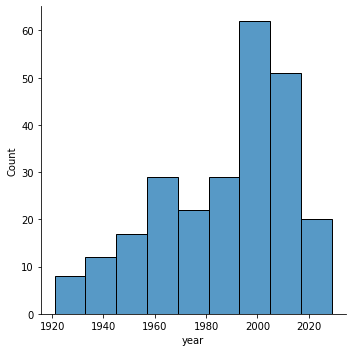

In [5]:
sns.displot(df, x="year",binwidth=12)

## distribution over runtime
#### first we need to convert time string to a time datatype

In [6]:
df["runtime"]= pd.to_timedelta(df["runtime"])
df.head()

,Unnamed: 0,title,rating,director,year,runtime,age rating,image link,webpage
0,0,The Shawshank Redemption,9.3,Frank Darabont,1994,0 days 02:22:00,15,images\TheShawshankRedemption.jpg,http://www.imdb.com/title/tt0111161/
1,1,The Godfather,9.2,Francis Ford Coppola,1972,0 days 02:55:00,X,images\TheGodfather.jpg,http://www.imdb.com/title/tt0068646/
2,2,The Dark Knight,9.0,Christopher Nolan,2008,0 days 02:32:00,12A,images\TheDarkKnight.jpg,http://www.imdb.com/title/tt0468569/
3,3,The Godfather Part II,9.0,Francis Ford Coppola,1974,0 days 03:22:00,X,images\TheGodfatherPartII.jpg,http://www.imdb.com/title/tt0071562/
4,4,12 Angry Men,9.0,Sidney Lumet,1957,0 days 01:36:00,U,images\12AngryMen.jpg,http://www.imdb.com/title/tt0050083/


In [7]:
# https://stackoverflow.com/a/57844781
# nice lambda for total seconds 
seconds = df['runtime'].apply(lambda x: x.total_seconds())

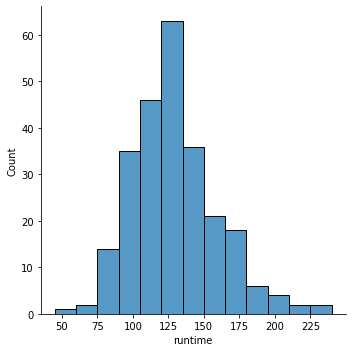

In [8]:
sns.displot(df, x=seconds/60,binwidth=15)

### now we have an idea of what other data is like
# lets look at the posters

### getting mot frequent colour for a single film poster

In [9]:
im = Image.open(df['image link'][4])
colours = max(im.getcolors(im.size[0]*im.size[1]))
colours

(1646, (255, 228, 4))

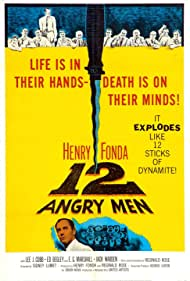

In [10]:
im

#### plotting the colour for comparison

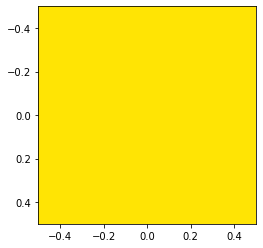

In [11]:
plt.imshow([[(colours[1][0], colours[1][1], colours[1][2])]])

## adding most frequent colour to dataset for all images

In [12]:
colours = []
for link in df['image link']:
    colour = []
    im = Image.open(link)
    imcol = max(im.getcolors(im.size[0]*im.size[1]))
    colour.append(str(imcol[1][0]))
    colour.append(str(imcol[1][1]))
    colour.append(str(imcol[1][2]))
    colours.append(colour)
df['main colour'] = colours
df.head()

,Unnamed: 0,title,rating,director,year,runtime,age rating,image link,webpage,main colour
0,0,The Shawshank Redemption,9.3,Frank Darabont,1994,0 days 02:22:00,15,images\TheShawshankRedemption.jpg,http://www.imdb.com/title/tt0111161/,"[11, 6, 3]"
1,1,The Godfather,9.2,Francis Ford Coppola,1972,0 days 02:55:00,X,images\TheGodfather.jpg,http://www.imdb.com/title/tt0068646/,"[0, 0, 0]"
2,2,The Dark Knight,9.0,Christopher Nolan,2008,0 days 02:32:00,12A,images\TheDarkKnight.jpg,http://www.imdb.com/title/tt0468569/,"[0, 0, 2]"
3,3,The Godfather Part II,9.0,Francis Ford Coppola,1974,0 days 03:22:00,X,images\TheGodfatherPartII.jpg,http://www.imdb.com/title/tt0071562/,"[0, 0, 0]"
4,4,12 Angry Men,9.0,Sidney Lumet,1957,0 days 01:36:00,U,images\12AngryMen.jpg,http://www.imdb.com/title/tt0050083/,"[255, 228, 4]"


# plotting all poster colours in 3d 

No handles with labels found to put in legend.


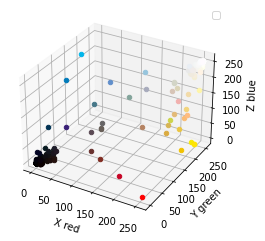

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

Colours250 = df['main colour']
   
for colour  in Colours250:
    x = int(colour[0])
    y = int(colour[1])
    z = int(colour[2])
    ax.scatter(x, y, z, color = (float(colour[0])/255,float(colour[1])/255,float(colour[2])/255))  # this way you can control color/marker/size of each group freely

ax.legend()

ax.set_xlabel('X red')
ax.set_ylabel('Y green')
ax.set_zlabel('Z blue')

plt.show()

### we have been looking at the most frequent rgb value however this means that if the poster uses a colour gradient a solid colour e.g. on the lettering may be selected as the most frequent colour

### we are going to use the colorThief library to capture a set of most dominant colours in an image

In [14]:
# https://github.com/fengsp/color-thief-py
color_thief = ColorThief('images/12AngryMen.jpg')

# 1 gives highest quality but is slowest value of quality to run
palette = color_thief.get_palette(color_count=4, quality = 1)

palette

[(29, 58, 70), (245, 219, 14), (227, 226, 212), (171, 79, 9)]

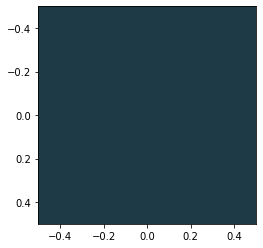

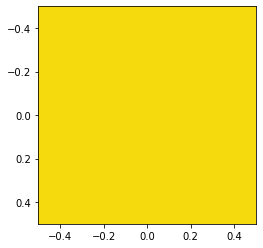

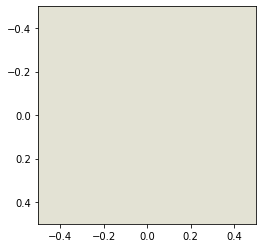

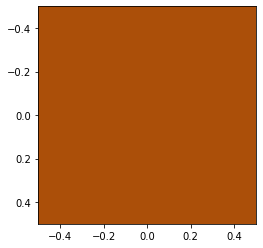

In [15]:
for colour in palette:
    fig, ax = plt.subplots()
    ax.imshow([[(colour[0], colour[1], colour[2])]])
plt.show()

## adding poster palette colours to dataset

In [16]:
palette1 = []
palette2 = []
palette3 = []
palette4 = []
palettes = []
for link in df['image link']:
    color_thief = ColorThief(link)
    palette = color_thief.get_palette(color_count=4, quality = 1)
    palettes.append(palette)
    palette1.append(palette[0])
    palette2.append(palette[1])
    palette3.append(palette[2])
    palette4.append(palette[3])
df['col1'] = palette1
df['col2'] = palette2
df['col3'] = palette3
df['col4'] = palette4
df['palette'] = palettes
df.head()

,Unnamed: 0,title,rating,director,year,runtime,age rating,image link,webpage,main colour,col1,col2,col3,col4,palette
0,0,The Shawshank Redemption,9.3,Frank Darabont,1994,0 days 02:22:00,15,images\TheShawshankRedemption.jpg,http://www.imdb.com/title/tt0111161/,"[11, 6, 3]","(220, 185, 144)","(31, 18, 14)","(140, 140, 133)","(138, 132, 132)","[(220, 185, 144), (31, 18, 14), (140, 140, 133..."
1,1,The Godfather,9.2,Francis Ford Coppola,1972,0 days 02:55:00,X,images\TheGodfather.jpg,http://www.imdb.com/title/tt0068646/,"[0, 0, 0]","(205, 173, 133)","(13, 9, 7)","(124, 124, 109)","(124, 116, 116)","[(205, 173, 133), (13, 9, 7), (124, 124, 109),..."
2,2,The Dark Knight,9.0,Christopher Nolan,2008,0 days 02:32:00,12A,images\TheDarkKnight.jpg,http://www.imdb.com/title/tt0468569/,"[0, 0, 2]","(25, 52, 66)","(189, 157, 141)","(115, 169, 181)","(92, 145, 166)","[(25, 52, 66), (189, 157, 141), (115, 169, 181..."
3,3,The Godfather Part II,9.0,Francis Ford Coppola,1974,0 days 03:22:00,X,images\TheGodfatherPartII.jpg,http://www.imdb.com/title/tt0071562/,"[0, 0, 0]","(9, 8, 7)","(213, 187, 125)","(124, 124, 124)","(124, 132, 84)","[(9, 8, 7), (213, 187, 125), (124, 124, 124), ..."
4,4,12 Angry Men,9.0,Sidney Lumet,1957,0 days 01:36:00,U,images\12AngryMen.jpg,http://www.imdb.com/title/tt0050083/,"[255, 228, 4]","(29, 58, 70)","(245, 219, 14)","(227, 226, 212)","(171, 79, 9)","[(29, 58, 70), (245, 219, 14), (227, 226, 212)..."


# lets compare popular directors by colour in movie posters
### we will look at 4 directors all with 7 films in the imdb top 250: Martin Scorsese, Christopher Nolan, Steven Spielberg, Stanley Kubrick

In [17]:
data = df.loc[df['director'] == 'Martin Scorsese', ['palette','title']]

In [18]:
data

,palette,title
16,"[(14, 12, 14), (185, 176, 183), (117, 140, 166...",GoodFellas
38,"[(192, 161, 139), (21, 17, 15), (120, 136, 124...",The Departed
117,"[(40, 41, 37), (221, 208, 42), (107, 168, 149)...",Taxi Driver
130,"[(35, 28, 23), (215, 180, 108), (134, 144, 151...",The Wolf of Wall Street
135,"[(23, 18, 20), (170, 120, 88), (124, 132, 128)...",Casino
140,"[(22, 24, 31), (191, 173, 168), (91, 152, 165)...",Shutter Island
158,"[(194, 173, 175), (24, 20, 22), (130, 133, 137...",Raging Bull


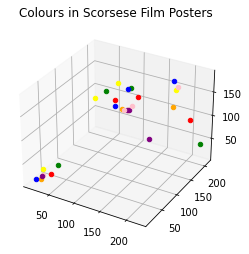

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
j = 0
colors = ('blue','orange','green','red','purple','yellow','pink')
for i in data.index:
    title = data['title'][i]
    for colour in data['palette'][i]:
        x = colour[0]
        y = colour[1]
        z = colour[2]
        ax.scatter(x, y, z, c=colors[j])
    j = j+1
plt.title("Colours in Scorsese Film Posters")
plt.show()

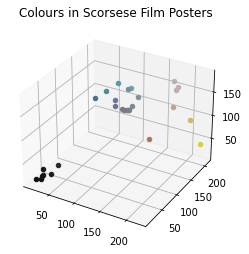

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in data.index:
    title = data['title'][i]
    for colour in data['palette'][i]:
        x = colour[0]
        y = colour[1]
        z = colour[2]
        ax.scatter(x, y, z, color=(float(colour[0])/255,float(colour[1])/255,float(colour[2])/255))
plt.title("Colours in Scorsese Film Posters")
plt.show()

### doing the same but with Stanley Kubrick film posters to compare

In [21]:
data = df.loc[df['director'] == 'Stanley Kubrick', ['palette','title']]

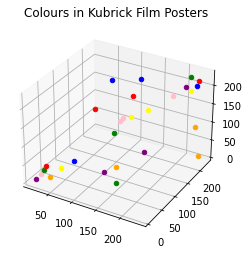

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
j = 0
colors = ('blue','orange','green','red','purple','yellow','pink')
for i in data.index:
    title = data['title'][i]
    for colour in data['palette'][i]:
        x = colour[0]
        y = colour[1]
        z = colour[2]
        ax.scatter(x, y, z, c=colors[j])
    j = j+1
plt.title("Colours in Kubrick Film Posters")
plt.show()

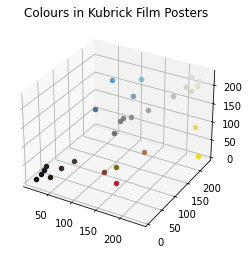

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in data.index:
    title = data['title'][i]
    for colour in data['palette'][i]:
        x = colour[0]
        y = colour[1]
        z = colour[2]
        ax.scatter(x, y, z, color=(float(colour[0])/255,float(colour[1])/255,float(colour[2])/255))
plt.title("Colours in Kubrick Film Posters")
plt.show()

# lets combine multiple director poster colours into a single scatter

In [28]:
data4 = df.loc[(df['director'] == 'Steven Spielberg') | (df['director'] == 'Martin Scorsese') | (df['director'] == 'Christopher Nolan') | (df['director'] == 'Stanley Kubrick'), ['palette','title','director']]

In [29]:
data4

,palette,title,director
2,"[(25, 52, 66), (189, 157, 141), (115, 169, 181...",The Dark Knight,Christopher Nolan
5,"[(221, 220, 217), (43, 41, 37), (116, 88, 85),...",Schindler's List,Steven Spielberg
13,"[(21, 46, 60), (179, 185, 195), (118, 165, 182...",Inception,Christopher Nolan
16,"[(14, 12, 14), (185, 176, 183), (117, 140, 166...",GoodFellas,Martin Scorsese
22,"[(70, 75, 82), (205, 197, 201), (160, 166, 182...",Saving Private Ryan,Steven Spielberg
24,"[(179, 191, 196), (38, 45, 51), (85, 90, 97), ...",Interstellar,Christopher Nolan
38,"[(192, 161, 139), (21, 17, 15), (120, 136, 124...",The Departed,Martin Scorsese
40,"[(15, 19, 24), (162, 163, 175), (107, 116, 134...",The Prestige,Christopher Nolan
53,"[(28, 18, 16), (231, 225, 212), (164, 67, 44),...",Memento,Christopher Nolan
55,"[(133, 105, 79), (39, 37, 36), (232, 221, 196)...",Raiders of the Lost Ark,Steven Spielberg


In [44]:
def getMarker(director):
    if director == 'Christopher Nolan':
        return 'o'
    elif director == 'Steven Spielberg':
        return '*'
    elif director == 'Martin Scorsese':
        return '^'
    elif director == 'Stanley Kubrick':
        return '+'
    else:
        return '!'

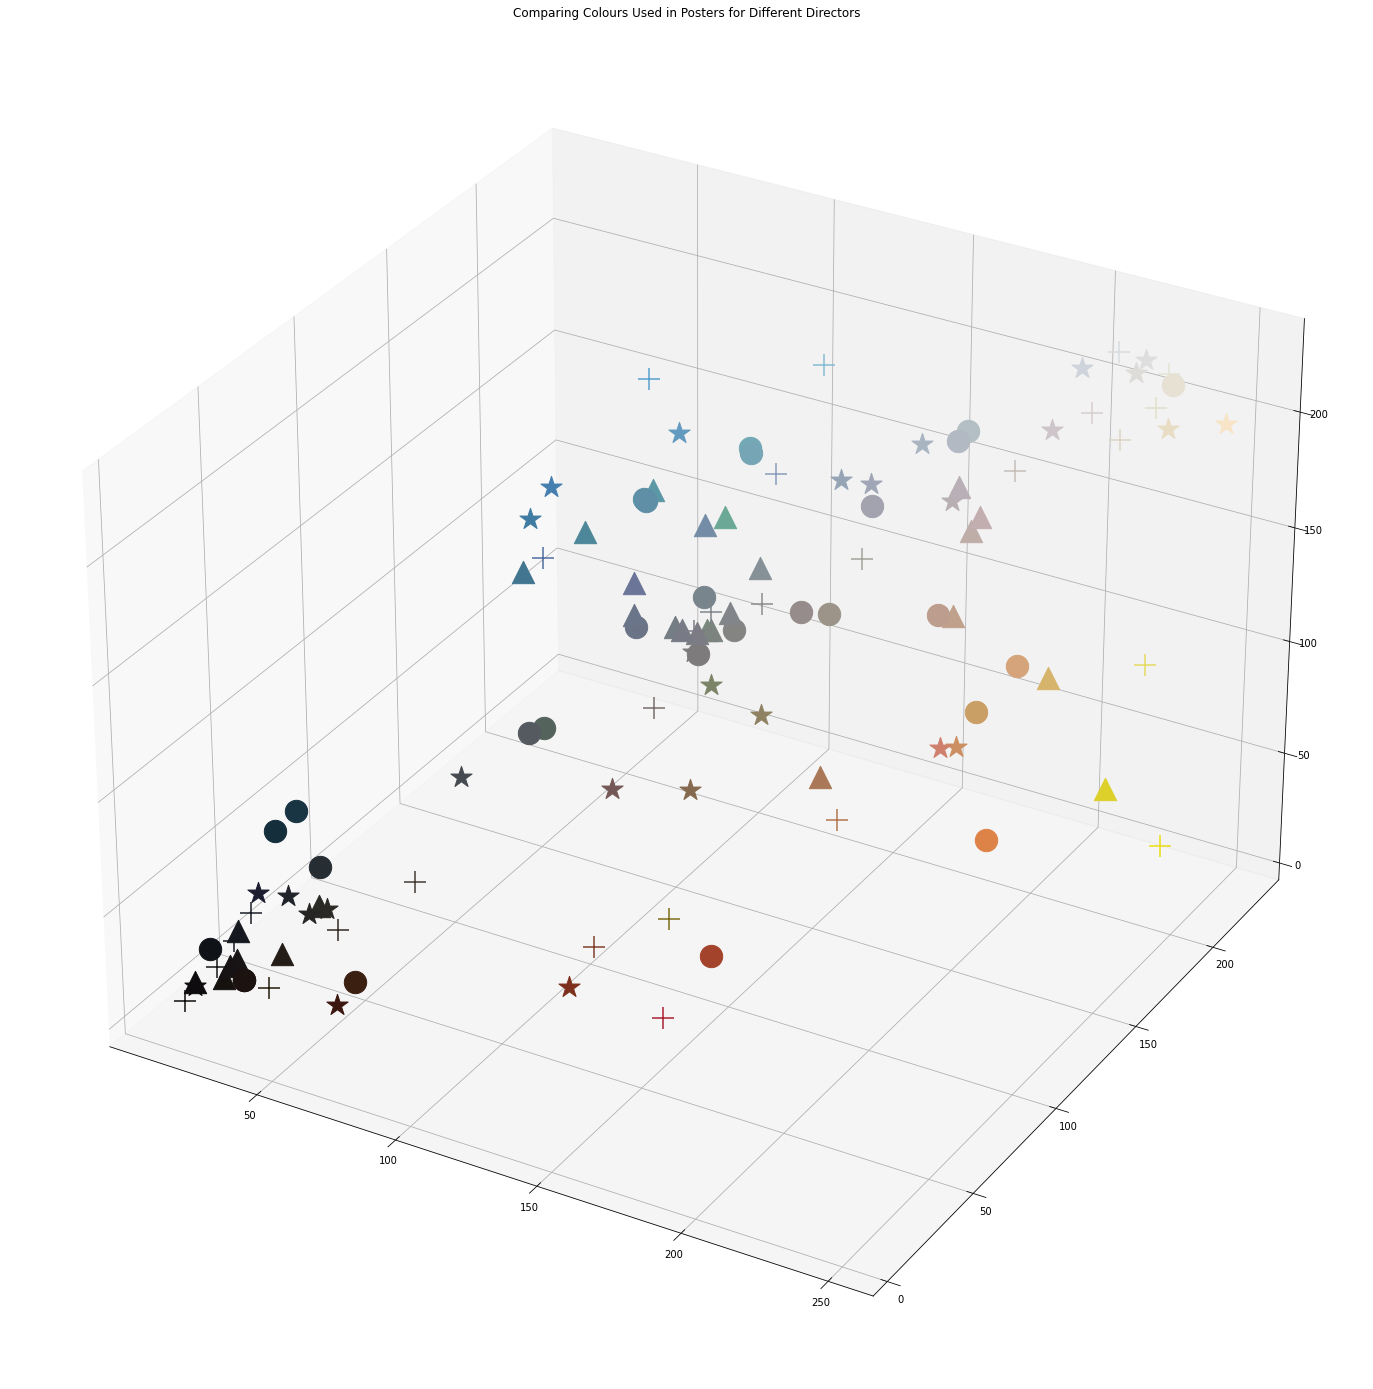

In [56]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for i in data4.index:
    title = data4['title'][i]
    for colour in data4['palette'][i]:
        marker = getMarker(data4['director'][i])
        x = colour[0]
        y = colour[1]
        z = colour[2]
        ax.scatter(x, y, z, color=(float(colour[0])/255,float(colour[1])/255,float(colour[2])/255), marker = marker,s=500)
plt.title("Comparing Colours Used in Posters for Different Directors")


fig.set_size_inches(25, 25)
plt.show()

# now lets look at average colour across age rating
#### we are going to do this by taking the main colour and splitting it into r  g b and then groupyby(rating) mean average 

In [129]:
df2 = df[['main colour','age rating']]

In [130]:
R=[]
G=[]
B=[]
for colour in df['main colour']:
    R.append(colour[0])
    G.append(colour[1])
    B.append(colour[2])
df2['R'] = R
df2['G'] = G
df2['B'] = B
df2['R'] = df2['R'].astype(int)
df2['G'] = df2['G'].astype(int)
df2['B'] = df2['B'].astype(int)
df2 = df2[['R','G','B','age rating']]

<ipython-input-130-3e8c36932efe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['R'] = R
<ipython-input-130-3e8c36932efe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['G'] = G
<ipython-input-130-3e8c36932efe>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [131]:
df2

,R,G,B,age rating
0,11,6,3,15
1,0,0,0,X
2,0,0,2,12A
3,0,0,0,X
4,255,228,4,U
...,...,...,...,...
245,215,181,84,AA
246,255,254,255,U
247,234,197,67,12A
248,255,251,255,U


In [132]:
df2 = df2.groupby(['age rating'])['R','G','B'].mean()

<ipython-input-132-336e62661b00>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df2.groupby(['age rating'])['R','G','B'].mean()


# now we have the colours we can plot them 

In [133]:
df2

,R,G,B
age rating,,,
12,176.833333,168.666667,155.666667
12A,62.517241,67.206897,65.344828
15,68.611111,68.000000,68.129630
18,98.514286,95.857143,87.857143
A,180.878788,166.090909,154.636364
AA,161.166667,151.500000,127.166667
Not Rated,1.000000,0.000000,0.000000
PG,111.642857,107.535714,106.035714
R,0.000000,0.000000,0.000000


In [134]:
df2 = df2.reset_index()

In [135]:
df2

,age rating,R,G,B
0,12,176.833333,168.666667,155.666667
1,12A,62.517241,67.206897,65.344828
2,15,68.611111,68.000000,68.129630
3,18,98.514286,95.857143,87.857143
4,A,180.878788,166.090909,154.636364
5,AA,161.166667,151.500000,127.166667
6,Not Rated,1.000000,0.000000,0.000000
7,PG,111.642857,107.535714,106.035714
8,R,0.000000,0.000000,0.000000
9,U,176.210526,177.842105,167.868421


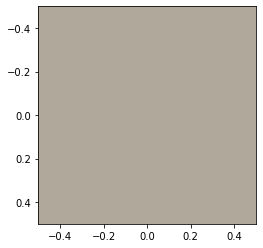

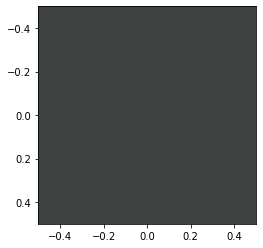

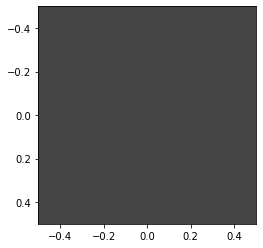

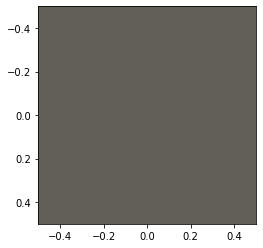

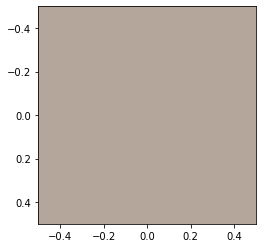

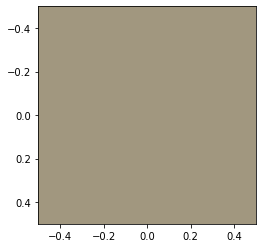

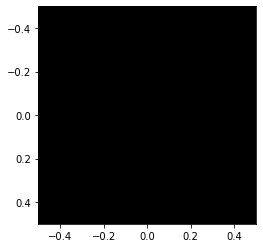

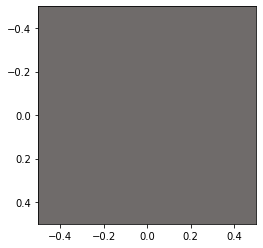

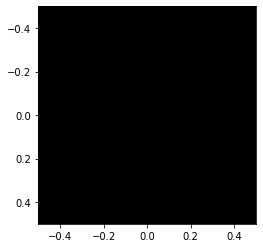

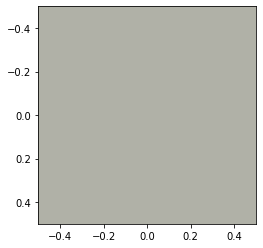

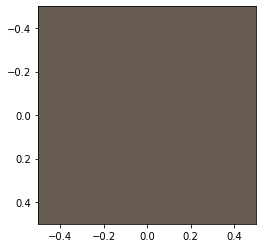

In [138]:
for i in df2.index:
    fig, ax = plt.subplots()
    ax.imshow([[((df2['R'][i])/255,(df2['G'][i])/255,(df2['B'][i])/255)]])
plt.show()

In [139]:
df

,Unnamed: 0,title,rating,director,year,runtime,age rating,image link,webpage,main colour,col1,col2,col3,col4,palette,mainR
0,0,The Shawshank Redemption,9.3,Frank Darabont,1994,0 days 02:22:00,15,images\TheShawshankRedemption.jpg,http://www.imdb.com/title/tt0111161/,"[11, 6, 3]","(220, 185, 144)","(31, 18, 14)","(140, 140, 133)","(138, 132, 132)","[(220, 185, 144), (31, 18, 14), (140, 140, 133...","[11, 6, 3]"
1,1,The Godfather,9.2,Francis Ford Coppola,1972,0 days 02:55:00,X,images\TheGodfather.jpg,http://www.imdb.com/title/tt0068646/,"[0, 0, 0]","(205, 173, 133)","(13, 9, 7)","(124, 124, 109)","(124, 116, 116)","[(205, 173, 133), (13, 9, 7), (124, 124, 109),...","[0, 0, 0]"
2,2,The Dark Knight,9.0,Christopher Nolan,2008,0 days 02:32:00,12A,images\TheDarkKnight.jpg,http://www.imdb.com/title/tt0468569/,"[0, 0, 2]","(25, 52, 66)","(189, 157, 141)","(115, 169, 181)","(92, 145, 166)","[(25, 52, 66), (189, 157, 141), (115, 169, 181...","[0, 0, 2]"
3,3,The Godfather Part II,9.0,Francis Ford Coppola,1974,0 days 03:22:00,X,images\TheGodfatherPartII.jpg,http://www.imdb.com/title/tt0071562/,"[0, 0, 0]","(9, 8, 7)","(213, 187, 125)","(124, 124, 124)","(124, 132, 84)","[(9, 8, 7), (213, 187, 125), (124, 124, 124), ...","[0, 0, 0]"
4,4,12 Angry Men,9.0,Sidney Lumet,1957,0 days 01:36:00,U,images\12AngryMen.jpg,http://www.imdb.com/title/tt0050083/,"[255, 228, 4]","(29, 58, 70)","(245, 219, 14)","(227, 226, 212)","(171, 79, 9)","[(29, 58, 70), (245, 219, 14), (227, 226, 212)...","[255, 228, 4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,Life of Brian,8.0,Terry Jones,1979,0 days 01:34:00,AA,images\LifeofBrian.jpg,http://www.imdb.com/title/tt0079470/,"[215, 181, 84]","(201, 170, 94)","(238, 233, 224)","(74, 65, 48)","(173, 60, 27)","[(201, 170, 94), (238, 233, 224), (74, 65, 48)...","[215, 181, 84]"
246,246,The Iron Giant,8.1,Brad Bird,1999,0 days 01:26:00,U,images\TheIronGiant.jpg,http://www.imdb.com/title/tt0129167/,"[255, 254, 255]","(98, 85, 78)","(220, 210, 197)","(175, 174, 164)","(153, 163, 173)","[(98, 85, 78), (220, 210, 197), (175, 174, 164...","[255, 254, 255]"
247,247,The Help,8.1,Tate Taylor,2011,0 days 02:26:00,12A,images\TheHelp.jpg,http://www.imdb.com/title/tt1454029/,"[234, 197, 67]","(215, 176, 73)","(84, 67, 83)","(213, 199, 197)","(122, 78, 80)","[(215, 176, 73), (84, 67, 83), (213, 199, 197)...","[234, 197, 67]"
248,248,Aladdin,8.0,Ron ClementsJohn Musker,1992,0 days 01:30:00,U,images\Aladdin.jpg,http://www.imdb.com/title/tt0103639/,"[255, 251, 255]","(225, 165, 67)","(26, 71, 146)","(182, 45, 49)","(208, 221, 231)","[(225, 165, 67), (26, 71, 146), (182, 45, 49),...","[255, 251, 255]"
